In [1]:
pip install graphviz


   ---------------------------------------- 0.0/47.3 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.3 kB 320.0 kB/s eta 0:00:01
   ---------------------------------------- 47.3/47.3 kB 588.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
import sklearn as sl
import pandas as pd
import numpy as np
import graphviz as g
data = pd.read_csv(r'C:\Users\Shanu\Desktop\Elevate Task\heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [15]:
# this will define features (X) and target (y)
X = data.drop("target", axis=1)  # Features: all columns except 'target'
y = data["target"]              # Target: 'target' column

In [17]:
#Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [21]:
# Now we will Create and train the Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

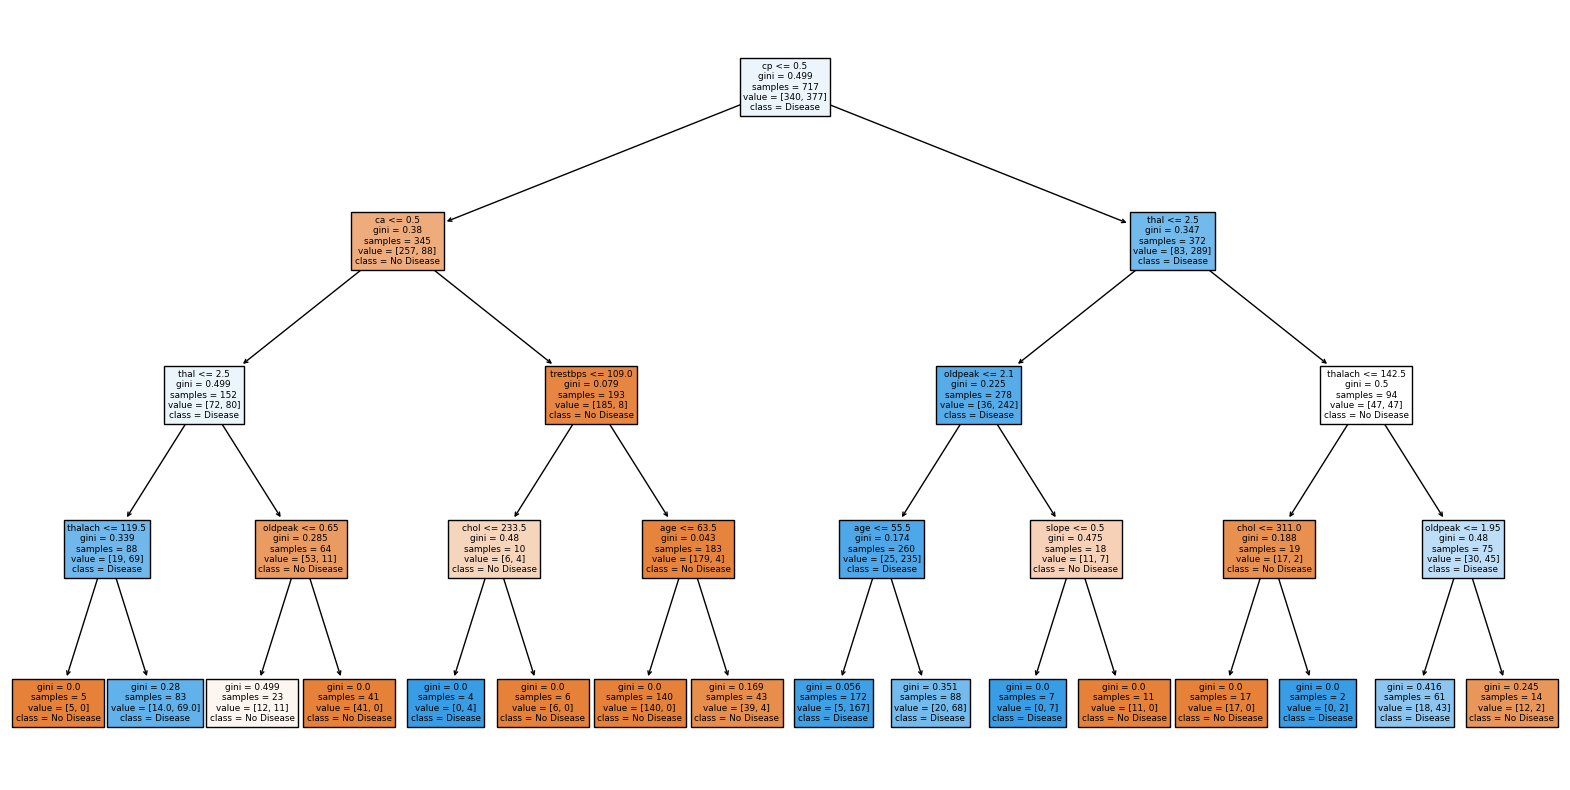

In [23]:
# Now we will visualize
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

In [25]:
train_acc = []
test_acc = []
depths = range(1, 16)  # try depths from 1 to 15

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

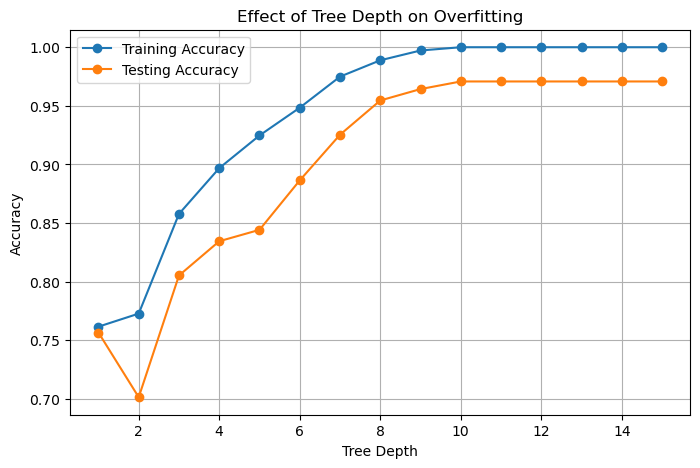

In [27]:
plt.figure(figsize=(8,5))
plt.plot(depths, train_acc, label="Training Accuracy", marker='o')
plt.plot(depths, test_acc, label="Testing Accuracy", marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Tree Depth on Overfitting")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
best_depth = depths[test_acc.index(max(test_acc))]
clf_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_final.fit(X_train, y_train)

print(f"Best Depth: {best_depth}")
print("Training Accuracy:", clf_final.score(X_train, y_train))
print("Testing Accuracy:", clf_final.score(X_test, y_test))

Best Depth: 10
Training Accuracy: 1.0
Testing Accuracy: 0.9707792207792207


In [31]:
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_clf.fit(X_train, y_train)

dt_train_acc = dt_clf.score(X_train, y_train)
dt_test_acc = dt_clf.score(X_test, y_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf_clf.fit(X_train, y_train)

rf_train_acc = rf_clf.score(X_train, y_train)
rf_test_acc = rf_clf.score(X_test, y_test)

In [39]:
print("Decision Tree - Training Accuracy:", dt_train_acc)
print("Decision Tree - Testing Accuracy :", dt_test_acc)
print("Random Forest - Training Accuracy:", rf_train_acc)
print("Random Forest - Testing Accuracy :", rf_test_acc)


Decision Tree - Training Accuracy: 0.8967921896792189
Decision Tree - Testing Accuracy : 0.8344155844155844
Random Forest - Training Accuracy: 0.9330543933054394
Random Forest - Testing Accuracy : 0.8863636363636364


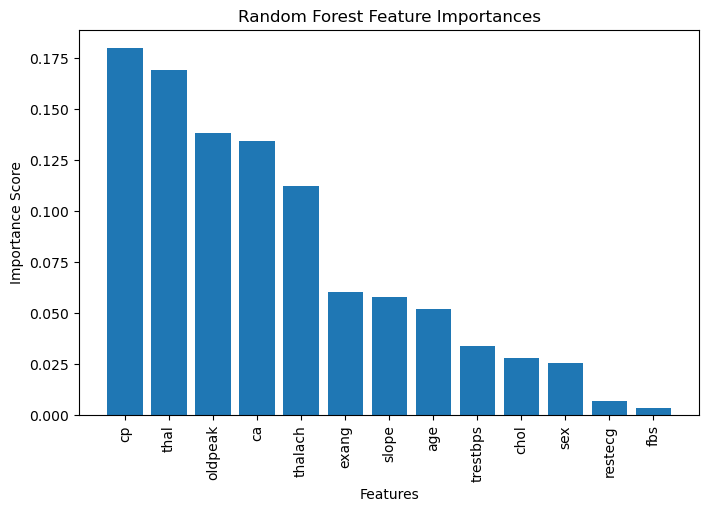

In [45]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Plot
plt.figure(figsize=(8,5))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importances")
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score

# Decision Tree Cross-Validation
dt_cv_scores = cross_val_score(dt_clf, X, y, cv=5)  # 5-fold CV
print("Decision Tree CV Accuracy:", dt_cv_scores)
print("Decision Tree Mean Accuracy:", dt_cv_scores.mean())

# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(rf_clf, X, y, cv=5)
print("Random Forest CV Accuracy:", rf_cv_scores)
print("Random Forest Mean Accuracy:", rf_cv_scores.mean())

Decision Tree CV Accuracy: [0.84390244 0.83414634 0.87317073 0.80487805 0.81463415]
Decision Tree Mean Accuracy: 0.8341463414634147
Random Forest CV Accuracy: [0.93658537 0.87804878 0.92682927 0.87317073 0.85853659]
Random Forest Mean Accuracy: 0.8946341463414635
